<a href="https://colab.research.google.com/github/YasinnSoylu/apple-stock-price-prediction-using-ARIMA-AND-SARIMA/blob/main/ar%C4%B1ma_sar%C4%B1max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# ARIMA

ARIMA (Autoregressive Integrated Moving Average) is a statistical model used for time series forecasting. It combines three components:

Autoregression (AR): This component models the relationship between the target variable and its previous values. The autoregressive term refers to the regression of the target variable on its own past values. In other words, it is a linear regression model with one or more lagged values of the target variable as predictors.

Integrated (I): This component involves differencing the target variable to make it stationary. Stationarity means that the mean and variance of the series do not change over time. Differencing involves subtracting the current value of the series from its previous value. This is done until the series becomes stationary.

Moving Average (MA): This component models the relationship between the target variable and its past errors. The moving average term refers to the use of past errors to predict the current value of the target variable.

ARIMA models are denoted as ARIMA(p,d,q), where p, d, and q are integers.

p is the order of the autoregressive component
d is the degree of differencing
q is the order of the moving average component.
The values of these parameters are usually selected using statistical techniques such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC).

ARIMA is a powerful and flexible model that can capture a wide range of time series patterns, including trends, seasonality, and cycles. It has been widely used in various fields, such as finance, economics, and engineering, for forecasting and modeling purposes.

In [ ]:
# fetch financial data of 'AAPL' stock from Yahoo Finance for the given date range
data = yf.download('AAPL', start='2022-04-04', end='2023-04-04')
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,177.365570,76468400
2022-04-05,177.500000,178.300003,174.419998,175.059998,174.005920,73401800
2022-04-06,172.360001,173.630005,170.130005,171.830002,170.795380,89058800
2022-04-07,171.160004,173.360001,169.850006,172.139999,171.103500,77594700
2022-04-08,171.779999,171.779999,169.199997,170.089996,169.065842,76575500
...,...,...,...,...,...,...
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700


In [ ]:
# select only the 'Close' column from the fetched data
data = data[['Close']]
data

,Close
Date,
2022-04-04,178.440002
2022-04-05,175.059998
2022-04-06,171.830002
2022-04-07,172.139999
2022-04-08,170.089996
...,...
2023-03-28,157.649994
2023-03-29,160.770004
2023-03-30,162.360001


Here, using the yf.download() function, the financial data in the specified date range for the 'AAPL' stock is downloaded. The start and end parameters specify when the data starts and ends. Then, with data[['Close']], only the closing prices in the data are selected by taking only the Close column. This returns a Pandas DataFrame containing only price data that will be used in the next steps.

In [ ]:
# remove any rows with missing values
data.dropna(inplace=True)

# resample the data to daily frequency and select the last observation
data = data.resample('D').last()

# fill any missing values using forward fill method
data.fillna(method='ffill', inplace=True)

<ipython-input-23-e88d2c1b6f08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


First, the dropna() method removes rows from the dataset with any missing values. Then, using the resample() method, the data is resampled at daily frequency and the last observation is selected for each day. Finally, using the fillna() method, missing values are filled with previous values (i.e. the fill-forward method). Thus, the data set is ready to be used as a time series.

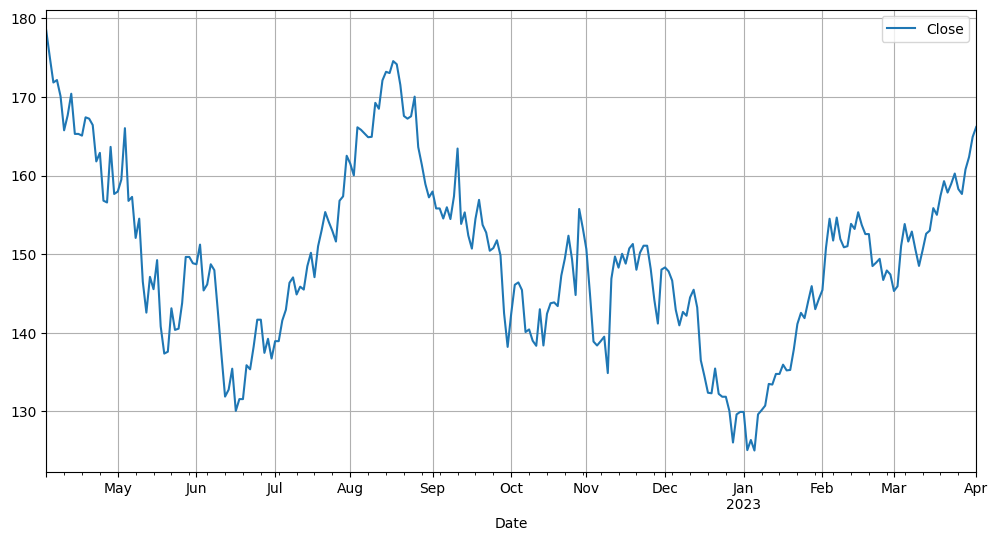

In [ ]:
# select only the weekdays by filtering out the weekend data
data = data[data.index.weekday < 5]

# visualize the data
data.plot(figsize=(12,6))
plt.grid()
plt.show()


<Figure size 640x480 with 0 Axes>

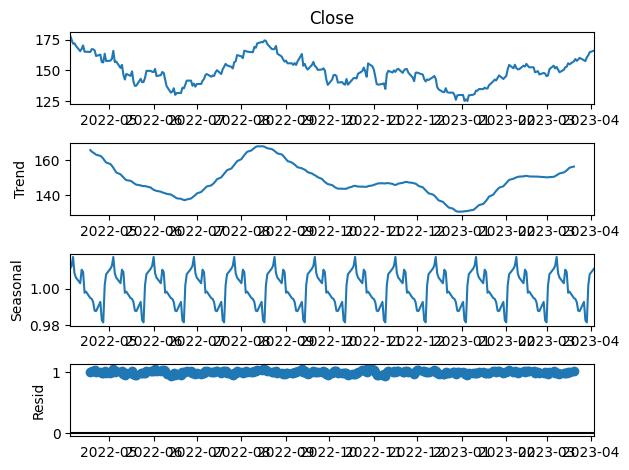

In [ ]:
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 20)

fig = plt.figure()
fig = result.plot()

The seasonal_decompose() function takes the time series data as input, and performs a decomposition into seasonal, trend, and residual components using the specified model. In this case, a multiplicative model is used, which assumes that the components are proportional to each other. The period parameter specifies the length of the seasonal component, which is set to 20 in this case.

The resulting decomposition is stored in the result variable. The plot() method of the result object is then called to generate a plot of the decomposed components. The resulting plot shows the original time series, the seasonal component, the trend component, and the residual component. This can be useful for understanding the underlying patterns and trends in the data.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

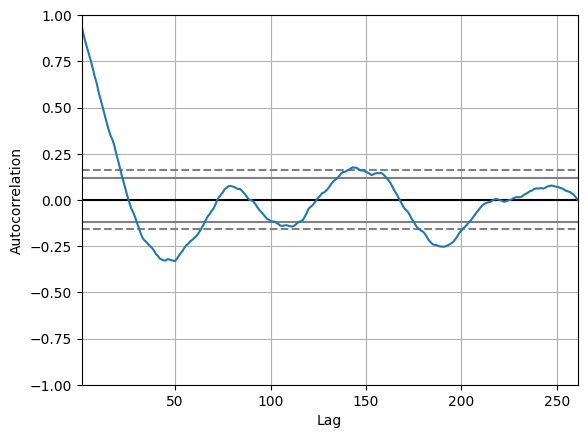

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

The autocorrelation_plot() function takes the time series data as input, and plots the autocorrelation of the series at different lags. The x-axis represents the lag, while the y-axis represents the autocorrelation coefficient. The autocorrelation coefficient is a measure of the linear relationship between the time series and a lagged version of itself. A high autocorrelation at a particular lag indicates that the time series is highly dependent on its past values at that lag.

By looking at the plot, we can identify any significant autocorrelation at certain lags, which can help us choose appropriate values for the ARIMA model parameters. If the autocorrelation plot shows a rapid decline to zero, this indicates that the time series is stationary and that an ARIMA model may be appropriate. If the autocorrelation plot shows a slow decay, this suggests that the time series is non-stationary and may require differencing before an ARIMA model can be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


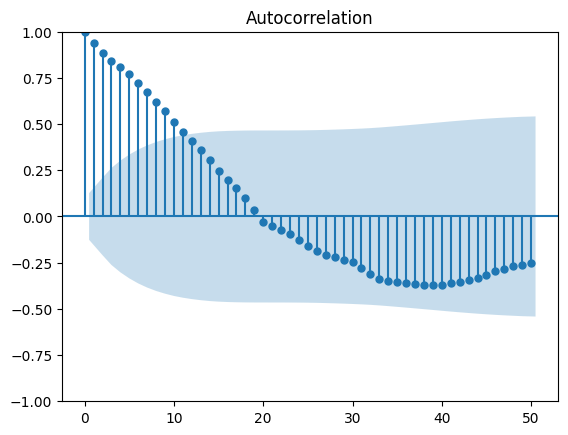

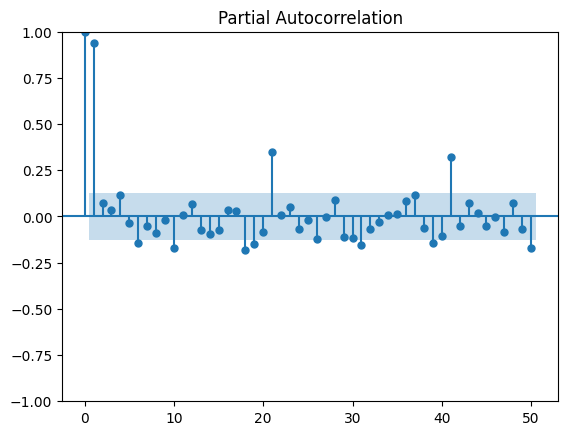

In [ ]:
seasonal_diff = data.diff(20).dropna()

plot_acf(seasonal_diff, lags=50)
plot_pacf(seasonal_diff, lags=50)
plt.show()


These two lines of code generate two plots: the autocorrelation function (ACF) plot and the partial autocorrelation function (PACF) plot of the differenced time series seasonal_diff. The ACF plot shows the correlation coefficients between the time series and its lagged values up to a certain number of lags, while the PACF plot shows the correlation coefficients between the time series and its lagged values, with the effect of the intermediate lags removed.

The lags argument specifies the number of lags to include in the plot. In this case, we set it to 50. The plot_acf function generates the ACF plot, while the plot_pacf function generates the PACF plot.

By looking at these plots, we can get an idea of the values of p and q for our SARIMA model. Specifically, p corresponds to the lag in the PACF plot where the plot first crosses the significance threshold, while q corresponds to the lag in the ACF plot where the plot first crosses the significance threshold.

In [ ]:
  # Define the SARIMA model parameters
p = 1  # order of the autoregressive part
d = 0  # degree of differencing
q = 1  # order of the moving average part
  
  
  #create the model
  model = ARIMA(data, order=(p,d,q)) # p, d, q değerleri
  model_fit = model.fit();
  print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  261
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -671.268
Date:                Mon, 08 May 2023   AIC                           1350.536
Time:                        21:51:06   BIC                           1364.794
Sample:                    04-04-2022   HQIC                          1356.267
                         - 04-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.6725      5.257     29.420      0.000     144.368     164.977
ar.L1          0.9748      0.015     66.094      0.000       0.946       1.004
ma.L1         -0.0627      0.062     -1.005      0.3

In this code block, an ARIMA model is created using the ARIMA class from the statsmodels.tsa.arima.model module.

The ARIMA model is a model used to make time series predictions using a combination of autoregressive (AR), integrated (I), and moving average (MA) terms.

The order parameter determines the p, d, and q values of the ARIMA model. These values represent the degrees of autoregressive terms (AR), time series difference (I), and moving average terms (MA), respectively.

After the created model is applied to the data set, it is made suitable using the model.fit() method. Finally, the model's summary statistics are displayed using the print(model_fit.summary()) code. These statistics are a set of statistical measures that show the quality of the model and how well the model fits.

In [ ]:
# Tahminleri yapalım
start_index = '2023-03-01'
end_index = '2023-04-03'
forecast = model_fit.predict(start=start_index, end=end_index)

This code block makes predictions using the ARIMA model created in the previous code block.

The predict method of the model_fit object is used to generate forecasts. The start and end parameters are used to specify the date range for which forecasts are required. In this case, the forecasts are generated for the dates ranging from start_index to end_index.

The predicted values are stored in the forecast variable.

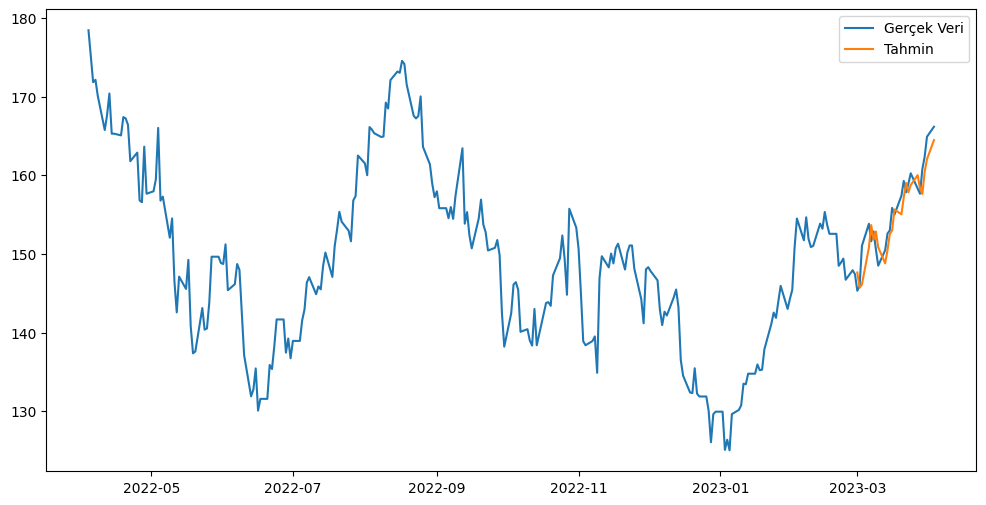

In [ ]:
# Tahminleri ve gerçek verileri görselleştirelim
plt.figure(figsize=(12,6))
plt.plot(data, label='Gerçek Veri')
plt.plot(forecast, label='Tahmin')
plt.legend()
plt.show()

In [ ]:
# Actual values
true_values = data["Close"][start_index:end_index]
# Predicted values
predicted_values = forecast.values

This code block creates two variables true_values and predicted_values that will be used to evaluate the accuracy of the model's forecasts.

true_values is a subset of the original data variable that includes the closing prices of the stock between the start_index and end_index dates.

predicted_values are the predicted closing prices of the stock for the same date range. These values are generated by the forecast.values attribute of the predict() method of the model_fit object.

In [ ]:
mse = mean_squared_error(true_values, predicted_values)
print("MSE value:", mse)
mae = mean_absolute_error(true_values, predicted_values)
print("Average Absolute Error (MAE):", mae)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)
r2=r2_score(true_values, predicted_values)
print("percentage error (r2):", r2)

MSE value: 4.739991385583969
Average Absolute Error (MAE): 1.9272924181556046
Root Mean Square Error (RMSE): 2.1771521273406615
percentage error (r2): 0.8377607288926895


This code block calculates various metrics to evaluate the accuracy of the ARIMA model's forecasts.

mean_squared_error() function from sklearn.metrics library is used to calculate the Mean Squared Error (MSE) between the true_values and predicted_values.

mean_absolute_error() function from the same library is used to calculate the Mean Absolute Error (MAE) between true_values and predicted_values.

np.sqrt() function is used to take the square root of the mse to get the Root Mean Squared Error (RMSE) between true_values and predicted_values.

r2_score() function is used to calculate the R-squared score which measures the percentage of the variance in the target variable (closing prices in this case) that is explained by the model's predictions.

All these calculated metrics are printed on the console.

# SARIMA

SARIMA (Seasonal Autoregressive Integrated Moving Average) is one of the time series models. Like ARIMA models, it is used to predict future values using historical data from current time series.

SARIMA is an extension of the ARIMA model and performs better for seasonal data. SARIMA is effective when there are seasonal variations in time series data. For example, the SARIMA model is effective when there are seasonal variations in annual, monthly or weekly data.

The SARIMA model includes three basic parameter sets: (1) autoregressive (AR) terms, (2) moving average (MA) terms, and (3) degree of difference (d and D). In addition, seasonal AR, MA, and degree of difference parameters can be included.

AR terms are models in which historical data is used as a direct independent variable and used to estimate the current value. MA terms are models in which the sum of the historical values of the errors is used in estimation. The degree of difference is a type of transformation in which the difference between data is calculated.

The SARIMA model allows current data to be modeled as a function of historical data and takes seasonal variations into account. Therefore, the SARIMA model can make more accurate predictions by taking into account seasonal variations in time series data.

The SARIMA model uses a number of techniques to estimate the model parameters of the data. The most common of these techniques are maximum likelihood estimation (MLE) and Bayesian statistics.

The SARIMA model can be used to predict changes and trends in time series. Therefore, the SARIMA model is widely used in the analysis of time series data such as financial markets, climate forecast, economic data.

In [ ]:
# Get seasonal difference
seasonal_diff = data.diff(20).dropna()

This code calculates the seasonal difference of the time series data. Seasonal differencing involves subtracting the value of the time series at a particular time with the value of the time series at the same time in the previous season. In this code, the diff() function is used to calculate the difference between the value of the time series 20 time periods ago and the current time period. The dropna() function is used to remove the rows with missing values.

In [ ]:
#Define the SARIMA model parameters
p = 1 # order of the autoregressive part
d = 1 # degree of differencing
q = 1 # order of the moving average part
P = 1 # order of the seasonal autoregressive part
D = 1 # degree of seasonal differencing
Q = 1 # order of the seasonal moving average part
s = 20 # length of the seasonal cycle (since we are working with daily data, s=20 because 1 month is 20 days)

#Create the SARIMA model
model = SARIMAX(data, order=(p,d,q), seasonal_order=(P,D,Q,s))

#Fit the model
model_fit2 = model.fit()

#Print the model parameters
print(model_fit2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  261
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 20)   Log Likelihood                -639.691
Date:                            Mon, 08 May 2023   AIC                           1289.383
Time:                                    21:51:13   BIC                           1306.786
Sample:                                04-04-2022   HQIC                          1296.395
                                     - 04-03-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3015      0.636      0.474      0.636      -0.946       1.549
ma.L1         -0.3966      0.615   

In [ ]:
#make the predictions
start_index = '2023-03-01'
end_index = '2023-04-03'
forecast2 = model_fit2.predict(start=start_index, end=end_index)

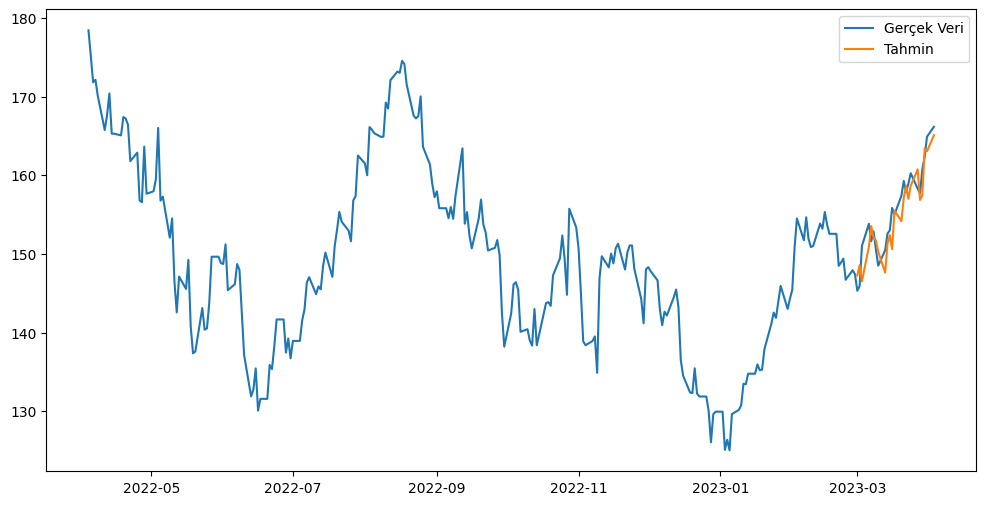

In [ ]:
# Visualization of forecasts and actual data
plt.figure(figsize=(12,6))
plt.plot(data, label='Gerçek Veri')
plt.plot(forecast2, label='Tahmin')
plt.legend()
plt.show()

In [ ]:
# Actual values
true_values = data["Close"][start_index:end_index]
# Predicted values
predicted_values = forecast2.values

In [ ]:
mse = mean_squared_error(true_values, predicted_values)
print("MSE value:", mse)
mae = mean_absolute_error(true_values, predicted_values)
print("Average Absolute Error (MAE):", mae)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)
r2=r2_score(true_values, predicted_values)
print("percentage error (r2):", r2)

MSE value: 5.495033573918373
Average Absolute Error (MAE): 2.0196902037473947
Root Mean Square Error (RMSE): 2.3441487951745668
percentage error (r2): 0.8119173286993471


# arıma vs sarıma

In [ ]:
# Predict 20 future values starting from the last data point
forecast = model_fit.predict(start=len(data), end=len(data)+39, dynamic=True)
forecast2 = model_fit2.forecast(steps=40)

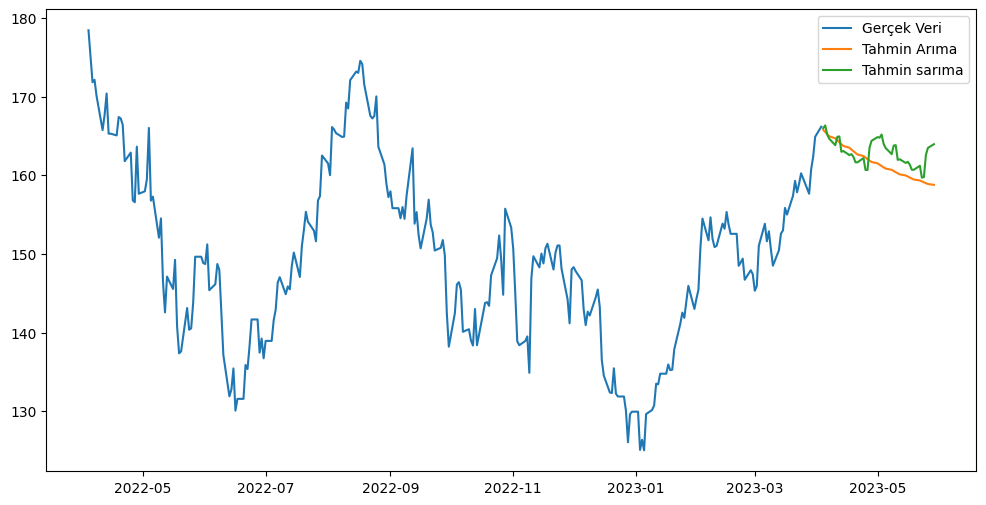

In [ ]:
# Visualization of forecasts and actual data
plt.figure(figsize=(12,6))
plt.plot(data[:], label='Gerçek Veri')
plt.plot(forecast, label='Tahmin Arıma')
plt.plot(forecast2, label='Tahmin sarıma')

plt.legend()
plt.show()